# Algoritmos de Clasificación Supervisada

**Índice:**
1. Importación de librerías y configuración
2. Regresión logística
3. K-Nearest Neighbors (K-NN)
4. Árboles de decisión
5. Random Forest
6. Support Vector Machines (SVM)
7. Comparación de algoritmos


In [22]:
# Importación de librerías y configuración
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


## 2. Regresión Logística

La regresión logística es un algoritmo de clasificación que modela la probabilidad de que una instancia pertenezca a una clase. Es especialmente útil para problemas de clasificación binaria.

**Ventajas:**
- Fácil de interpretar
- Rápido de entrenar
- Funciona bien con variables linealmente separables

**Desventajas:**
- No captura relaciones no lineales complejas


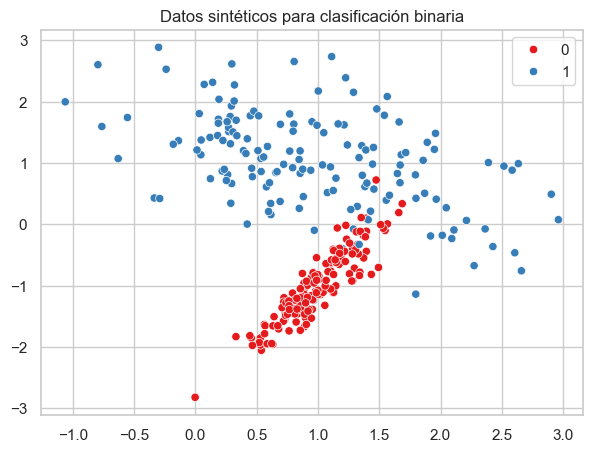

MAE: 0.044444444444444446
MSE: 0.044444444444444446
RMSE: 0.21081851067789195
R^2: 0.8221343873517786
Exactitud: 0.9555555555555556
Matriz de confusión: 
 [[44  2]
 [ 2 42]]
Precisión: 0.9545454545454546
Recall: 0.9545454545454546
Roc AUC:  0.9851778656126482


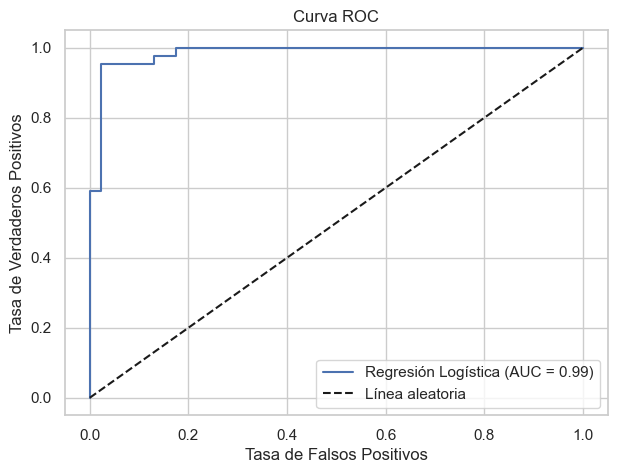

In [23]:
# Ejemplo de Regresión Logística
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generar datos sintéticos
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Visualización de los datos
plt.figure(figsize=(7,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1')
plt.title('Datos sintéticos para clasificación binaria')
plt.show()

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Metricas de error para regresión
mae_log = mean_absolute_error(y_test, y_pred)
mse_log = mean_squared_error(y_test, y_pred)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test, y_pred)

print('MAE:', mae_log)
print('MSE:', mse_log)
print('RMSE:', rmse_log)
print('R^2:', r2_log)

# Predicción y evaluación
y_proba_log = logreg.predict_proba(X_test_scaled)[:, 1]
print('Exactitud:', accuracy_score(y_test, y_pred))
print('Matriz de confusión: \n', confusion_matrix(y_test, y_pred))
print('Precisión:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Roc AUC: ', roc_auc_score(y_test, y_proba_log))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Regresión Logística (AUC = {:.2f})'.format(np.trapezoid(tpr, fpr)))
plt.plot([0, 1], [0, 1], 'k--', label='Línea aleatoria')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


## 3. K-Nearest Neighbors (K-NN)

K-NN es un algoritmo de clasificación basado en la proximidad de los datos. Clasifica una instancia según la mayoría de sus vecinos más cercanos.

**Ventajas:**
- Simple de entender e implementar
- No requiere entrenamiento explícito

**Desventajas:**
- Costoso computacionalmente para grandes volúmenes de datos
- Sensible a la escala de las variables y al valor de k


MAE K-NN: 0.0444
MSE K-NN: 0.0444
RMSE K-NN: 0.2108
R² K-NN: 0.8221
Exactitud K-NN: 0.9555555555555556
Precisión K-NN: 0.9761904761904762
Recall K-NN: 0.9318181818181818
Matriz de confusión K-NN: 
 [[45  1]
 [ 3 41]]
Roc AUC K-NN:  0.9597332015810278


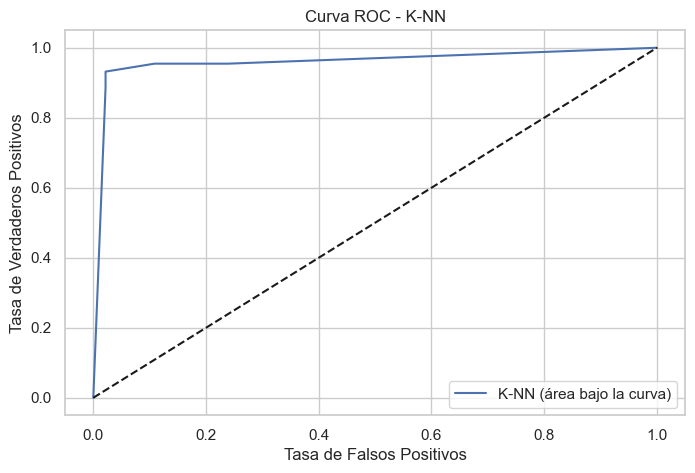

In [24]:
# Ejemplo de K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento y predicción con K-NN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Métricas de error para K-NN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MAE K-NN: {mae_knn:.4f}")
print(f"MSE K-NN: {mse_knn:.4f}")
print(f"RMSE K-NN: {rmse_knn:.4f}")
print(f"R² K-NN: {r2_knn:.4f}")

# Predicción y evaluación K-NN
print('Exactitud K-NN:', accuracy_score(y_test, y_pred_knn))
print('Precisión K-NN:', precision_score(y_test, y_pred_knn))
print('Recall K-NN:', recall_score(y_test, y_pred_knn))
print('Matriz de confusión K-NN: \n', confusion_matrix(y_test, y_pred_knn))
print('Roc AUC K-NN: ', roc_auc_score(y_test, y_proba_knn))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
plt.plot(fpr, tpr, label='K-NN (área bajo la curva)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - K-NN')
plt.legend()
plt.show()


## 4. Árboles de Decisión

Los árboles de decisión son modelos que dividen los datos en ramas según reglas de decisión, hasta llegar a una predicción final.

**Ventajas:**
- Fácil de interpretar y visualizar
- Captura relaciones no lineales

**Desventajas:**
- Puede sobreajustar fácilmente
- Sensible a pequeñas variaciones en los datos


MAE Árbol de Decisión: 0.06666666666666667
MSE Árbol de Decisión: 0.06666666666666667
RMSE Árbol de Decisión: 0.2581988897471611
R² Árbol de Decisión: 0.733201581027668
Exactitud Árbol de Decisión: 0.9333333333333333
Matriz de confusión Árbol de Decisión: 
 [[44  2]
 [ 4 40]]
Precisión Árbol de Decisión: 0.9523809523809523
Recall Árbol de Decisión: 0.9090909090909091
Roc AUC Árbol de Decisión:  0.908596837944664


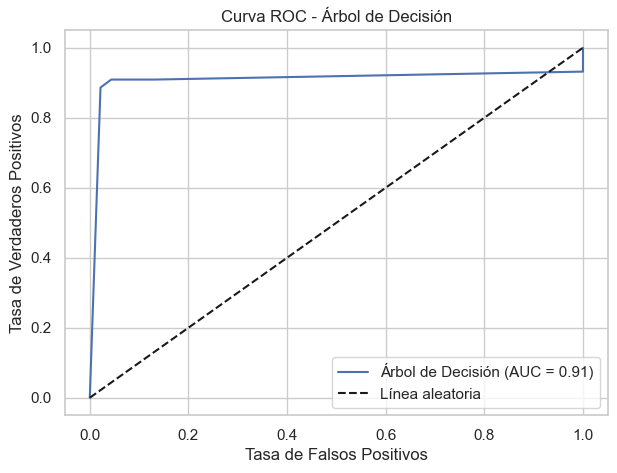

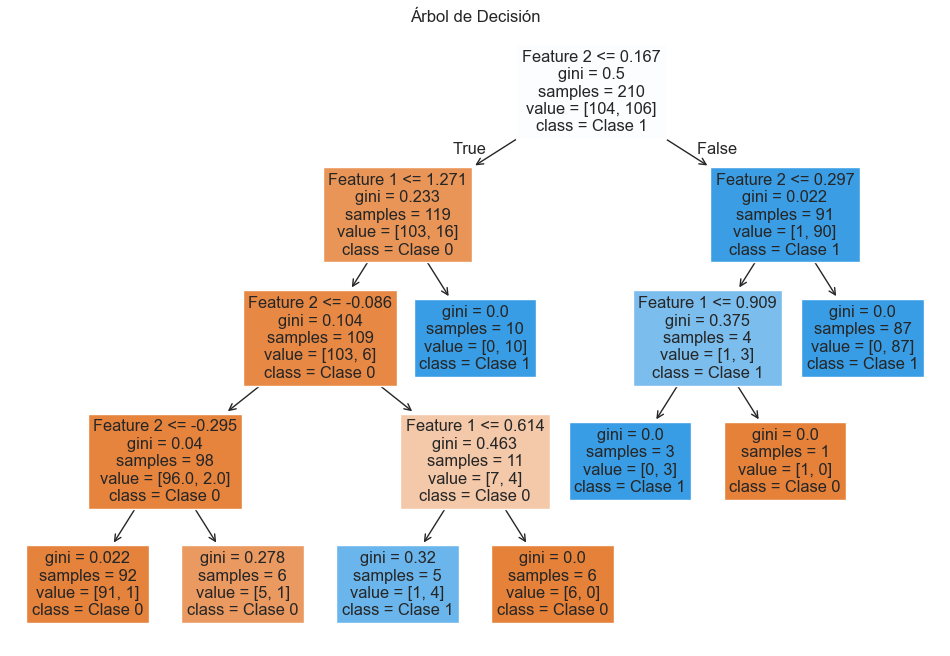

In [25]:
# Ejemplo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento y predicción con Árbol de Decisión
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Métricas de error para Árbol de Decisión
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print('MAE Árbol de Decisión:', mae_dt)
print('MSE Árbol de Decisión:', mse_dt)
print('RMSE Árbol de Decisión:', rmse_dt)
print('R² Árbol de Decisión:', r2_dt)

# Predicción y evaluación Árbol de Decisión
y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]
print('Exactitud Árbol de Decisión:', accuracy_score(y_test, y_pred_dt))
print('Matriz de confusión Árbol de Decisión: \n', confusion_matrix(y_test, y_pred_dt))
print('Precisión Árbol de Decisión:', precision_score(y_test, y_pred_dt))
print('Recall Árbol de Decisión:', recall_score(y_test, y_pred_dt))
print('Roc AUC Árbol de Decisión: ', roc_auc_score(y_test, y_proba_dt))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.2f})'.format(np.trapezoid(tpr, fpr)))
plt.plot([0, 1], [0, 1], 'k--', label='Línea aleatoria')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Árbol de Decisión')
plt.legend()
plt.show()

# Visualización del Árbol de Decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Clase 0', 'Clase 1'])
plt.title('Árbol de Decisión')
plt.show()


## 5. Random Forest

Random Forest es un conjunto de árboles de decisión entrenados sobre diferentes subconjuntos de los datos. La predicción se realiza por votación entre los árboles.

**Ventajas:**
- Reduce el sobreajuste
- Generaliza mejor que un solo árbol

**Desventajas:**
- Menos interpretable que un solo árbol
- Más costoso computacionalmente


MAE Random Forest: 0.044444444444444446
MSE Random Forest: 0.044444444444444446
RMSE Random Forest: 0.21081851067789195
R² Random Forest: 0.8221343873517786
Exactitud Random Forest: 0.9555555555555556
Matriz de confusión Random Forest: 
 [[45  1]
 [ 3 41]]
Precisión Random Forest: 0.9761904761904762
Recall Random Forest: 0.9318181818181818
Roc AUC Random Forest:  0.9844367588932806


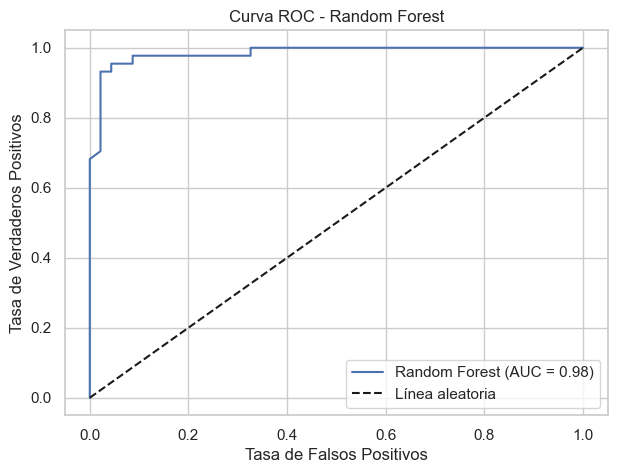

In [26]:
# Ejemplo de Random Forest
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento y predicción con Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Métricas de error para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('MAE Random Forest:', mae_rf)
print('MSE Random Forest:', mse_rf)
print('RMSE Random Forest:', rmse_rf)
print('R² Random Forest:', r2_rf)

# Predicción y evaluación Random Forest
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
print('Exactitud Random Forest:', accuracy_score(y_test, y_pred_rf))
print('Matriz de confusión Random Forest: \n', confusion_matrix(y_test, y_pred_rf))
print('Precisión Random Forest:', precision_score(y_test, y_pred_rf))
print('Recall Random Forest:', recall_score(y_test, y_pred_rf))
print('Roc AUC Random Forest: ', roc_auc_score(y_test, y_proba_rf))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(np.trapezoid(tpr, fpr)))
plt.plot([0, 1], [0, 1], 'k--', label='Línea aleatoria')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()


## 6. Support Vector Machines (SVM)

SVM es un algoritmo que busca el hiperplano que mejor separa las clases en el espacio de características. Puede usar funciones kernel para separar datos no lineales.

**Ventajas:**
- Eficaz en espacios de alta dimensión
- Flexible con diferentes kernels

**Desventajas:**
- Costoso para grandes volúmenes de datos
- Difícil de interpretar


MAE SVM: 0.044444444444444446
MSE SVM: 0.044444444444444446
RMSE SVM: 0.21081851067789195
R² SVM: 0.8221343873517786
Exactitud SVM: 0.9555555555555556
Matriz de confusión SVM: 
 [[45  1]
 [ 3 41]]
Precisión SVM: 0.9761904761904762
Recall SVM: 0.9318181818181818


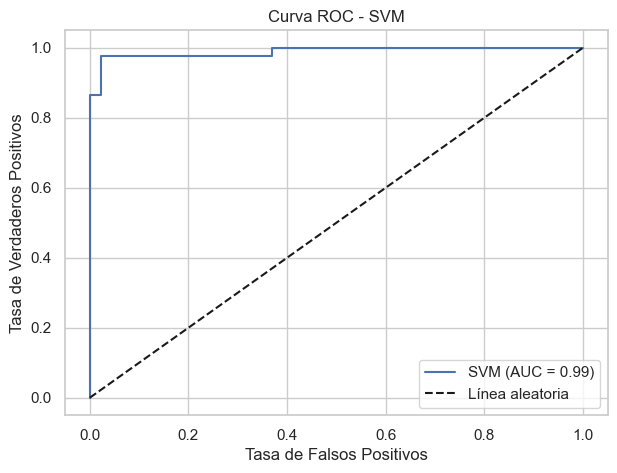

In [27]:
# Ejemplo de Support Vector Machines
from sklearn.svm import SVC

# Entrenamiento y predicción con SVM
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Métricas de error para SVM
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print('MAE SVM:', mae_svm)
print('MSE SVM:', mse_svm)
print('RMSE SVM:', rmse_svm)
print('R² SVM:', r2_svm)

# Predicción y evaluación SVM
y_proba_svm = svm.decision_function(X_test_scaled)
print('Exactitud SVM:', accuracy_score(y_test, y_pred_svm))
print('Matriz de confusión SVM: \n', confusion_matrix(y_test, y_pred_svm))
print('Precisión SVM:', precision_score(y_test, y_pred_svm))
print('Recall SVM:', recall_score(y_test, y_pred_svm))

# Curva ROC SVM
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(np.trapezoid(tpr, fpr)))
plt.plot([0, 1], [0, 1], 'k--', label='Línea aleatoria')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVM')
plt.legend()
plt.show()


## 7. Comparación de Algoritmos

A continuación se comparan los algoritmos anteriores en términos de exactitud sobre el mismo conjunto de datos sintéticos. Esto permite observar sus diferencias de desempeño en un problema de clasificación binaria sencillo.


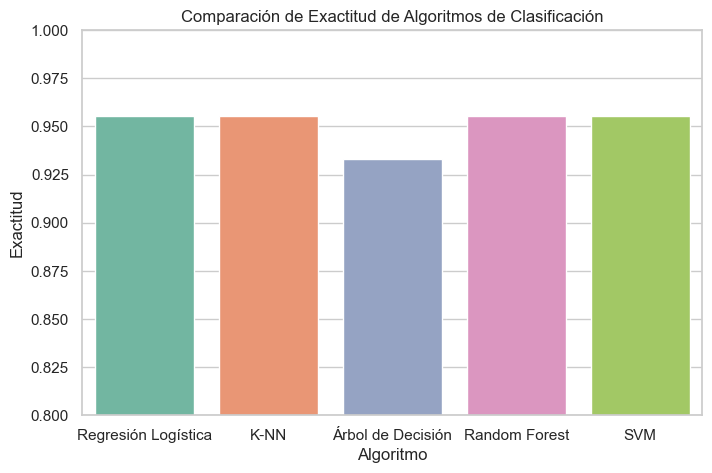

,Algoritmo,Exactitud
0,Regresión Logística,0.955556
1,K-NN,0.955556
2,Árbol de Decisión,0.933333
3,Random Forest,0.955556
4,SVM,0.955556


In [28]:
# Comparación de exactitud de los algoritmos
resultados = pd.DataFrame({
    'Algoritmo': ['Regresión Logística', 'K-NN', 'Árbol de Decisión', 'Random Forest', 'SVM'],
    'Exactitud': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ]
})

sns.barplot(x='Algoritmo', y='Exactitud', data=resultados, palette='Set2', hue='Algoritmo')
plt.title('Comparación de Exactitud de Algoritmos de Clasificación')
plt.ylim(0.8, 1.0)
plt.show()

resultados
# print(resultados)
# display(resultados)